# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="250px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="300px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

---
**Nota:** Como se desea minimizar el costo y la información disponible está en costo por gramo, las variables a optimizar deben estar en gramos.

---

#### Solución

Sean:
- $x_A$: la cantidad de gramos de A a ser producidas, y
- $x_B$: la cantidad de gramos de B a ser producidas en la semana.

Notar que lo que se quiere es minimizar $0.6x_A+0.2x_B$.

Restricciones:
1. El compuesto debe tener **al menos** $25 g$ de proteína: $30\%x_A+5\%x_B\geq 25 \Rightarrow 0.3x_A+0.05x_B\geq 25$.
2. El compuesto debe tener **al menos** $6 g$ de grasa: $1\%x_A+7\%x_B\geq 6 \Rightarrow 0.01x_A+0.07x_B\geq 6$.
3. El compuesto debe tener **al menos** $30 g$ de azúcares: $10\%x_A+10\%x_B\geq 30 \Rightarrow 0.1x_A+0.1x_B\geq 30$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

o, eqivalentemente
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

Preferiremos, en adelante, la notación vectorial/matricial.

Solución gráfica:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def prote(xA):
  return (25-0.3*xA)/0.05
def grasa(xA):
  return (6-0.01*xA)/0.07
def azucar(xA):
  return (30-0.1*xA)/0.1

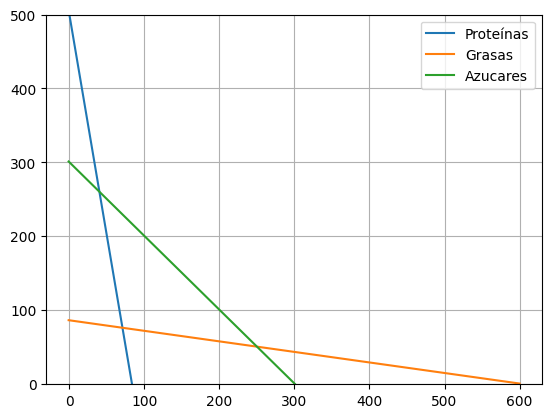

In [ ]:
xA=np.linspace(-1,600,100)

plt.plot(xA,prote(xA),label='Proteínas') # Restricción de Proteínas
plt.plot(xA,grasa(xA),label='Grasas')    # Restricción de Grasas
plt.plot(xA,azucar(xA),label='Azucares') # Restricción de Azucares
plt.legend()                             # Muestra las etiquetas
plt.ylim([-1,500])                       # Cortamos el eje 'y'
plt.grid()

**Notita:** Como las restricciones implican una relación en gramos mayor a cada línea graficada, la combinación de $A$ y $B$ que satisface las restricciones de proteínas, grasas y azucares está del lado derecho de todas las lineas. Necesitamos entonces evaluar el criterio de optimización en los puntos más cercanos al origen para encontar el costo mínimo.

In [ ]:
# Criterio de optimización (Costos)
def costo(xA,xB):
  return 0.6*xA+0.2*xB

In [ ]:
# Primer punto xA=0
# Evaluamos en la restricción de Proteínas  que es donde se cumplen todas las restricciones
#
prote(0) # xB

500.0

In [ ]:
# Primer punto (0,500)
costo(0,500)

100.0

In [ ]:
# Segundo punto. xA y xB donde las Proteínas y los Azucares son iguales
# Encontramos la solución igualando las restricciones de prote(xA)=azucar(xA)
#
import sympy as sym

In [ ]:
sym.var('xA')

# Encontramos la solución para xA
sym.solve(prote(xA)-azucar(xA))

[40.0000000000000]

In [ ]:
# Cuanto vale xB tal que cumpla con todas las restricciones
# Evaluamos en prote(40) o azucar(40)
#
prote(40),azucar(40)

(260.0, 260.0)

In [ ]:
# Segundo punto (40,260)
costo(40,260)

76.0

In [ ]:
# Tercer punto. xA y xB donde Grasas y Azucares son iguales
# Encontramos la solución para grasa(xA)=azucar(xA)
#
sym.solve(grasa(xA)-azucar(xA))

[250.000000000000]

In [ ]:
# Evaluamos en grasa(250) o azucar(250)
grasa(250),azucar(250)

(49.99999999999999, 50.0)

In [ ]:
# Tercer punto (250,50)
costo(250,50)

160.0

In [ ]:
# Cuarto punto. xB=0
# Encontramos el valor de xA donde xB=0 para grasa(xA)
#
sym.solve(grasa(xA))

[600.000000000000]

In [ ]:
# Cuarto punto (600,0)
costo(600,0)

360.0

La composición que minimiza el costo es de $40\ g$ para $A$ y $260\ g$ para $B$, resultando en $76\ u.m.$

---

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves.

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias?

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución:**

Se desea maximizar la ganancia
$$
\max_{x_C,x_A}600x_C+200x_A,
$$
donde $x_C$ es la cantidad de carrocerías de camión a fabricar y $x_A$ es la cantidad de carrocerías de automóvil a fabricar.

Bajo las restricciones de días operario para cada nave
* **Nave A:** $7x_C+2x_A\leq300$,
* **Nave B:** $3x_C+3x_A\leq270$.

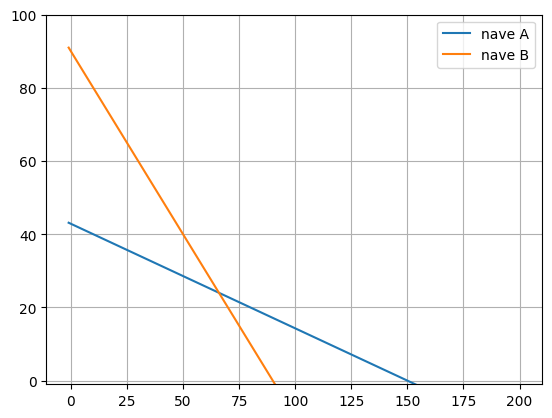

In [ ]:
def naveA(xA):
  return (300-2*xA)/7
def naveB(xA):
  return (270-3*xA)/3
xA=np.linspace(-1,200,100)
plt.plot(xA,naveA(xA),label='nave A')
plt.plot(xA,naveB(xA),label='nave B')
plt.legend()
plt.ylim([-1,100])
plt.grid()

In [ ]:
# Evaluamos en los tres puntos que satisfacen ambas restricciones. Buscando el valor máximo
def ganancia(xA,xC):
  return 600*xC+200*xA

In [ ]:
# Primer punto. xA=0 para la restricción de la nave A
naveA(0) # xC

42.857142857142854

In [ ]:
# Restricción para la nave A
xC=43
xA=0
7*xC+2*xA

301

In [ ]:
xC=42
xA=0
7*xC+2*xA

294

In [ ]:
# Primer punto (0,42)
ganancia(0,42)

25200

In [ ]:
# Segundo punto. Restricciones de la nave A y B son iguales
sym.var('xA')
sym.solve(naveA(xA)-naveB(xA))

[66]

In [ ]:
# Evaluamos en cualquier restricción
naveA(66),naveB(66)

(24.0, 24.0)

In [ ]:
# Segundo punto (66,24)
ganancia(66,24)

27600

In [ ]:
# Tercer punto. xC=0 en naveB
sym.solve(naveB(xA))

[90]

In [ ]:
# Tercer punto (90,0)
ganancia(90,0)

18000

Fabricando 66 carropcerías de automóvil y 24 de camión se consigue la ganancia máxima de 27600 u.m.

---

---


#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?



Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería.

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [ ]:
import scipy.optimize as opt

In [ ]:
# opt.linprog?

In [ ]:
c=np.array([-600,-200])   # Criterio de optimización. Coeficientes negativos=maximizar
A=np.array([[7,2],[3,3]]) # Coeficientes de las restricciones
b=np.array([300,270])     # Límite de las restricciones

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27600.0
              x: [ 2.400e+01  6.600e+01]
            nit: 2
          lower:  residual: [ 2.400e+01  6.600e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-8.000e+01 -1.333e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

La solución nos genera un atributo `fun` que expresa el objetivo optimizado (ganancia máxima) y el atributo `x` que nos da en orden las variables que generan ese resultado (carrocerías de camión y carrocerías de automóvil).

---

## Pasos para obtener la solución
1. Identificar el objetivo de optimización:
  * maximizar ganancias,
  * minimizar costos.
2. Identificar la información para llegar al objetivo:
  * ganancia por unidad de carrocería,
  * costos por gramo de producto.
3. Identificar las variables:
  * cantidad de carrocerías: $x_C\rightarrow$ de camión, $x_A\rightarrow$ de automóvil.
  * Gramos por producto: $x_A\rightarrow$ producto $A$, $x_B\rightarrow$ producto $B$.
4. Si la función objetivo es para maximizar, los coeficientes se escriben como negativos.
5. Identificar las restricciones respetando el orden de las variables.
6. Si la restricción tiene como signo $\leq$, los coeficientes serán positivos. Si la restricción tiene como signo $\geq$, los coeficientes serán negativos.

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

**Solución:**

1. Maximizamos la utilidad
2. $\$15$ por par de aretes y $\$20$ por cadenita
3. Definimos como $x_A$ a la cantidad de par de aretes y $x_C$ como la cantidad de cadenitas por vender.
4. $\max_{x_A,x_C}15x_A+20x_C\equiv\min_{x_A,c_C}-15x_A-20x_C$
5. Restricciones
  * de tiempo: $0.5x_A+1x_C\leq10$
  * de material: $x_A+x_C\leq15$

In [ ]:
c=np.array([-15,-20]) # (xA,xC)
A=np.array([[0.5,1],  # restricción de tiempo
            [1,  1]]) # restricción de material
b=np.array([10,15])   # límites (tiempo, material)

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -250.0
              x: [ 1.000e+01  5.000e+00]
            nit: 2
          lower:  residual: [ 1.000e+01  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+01 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Respuesta:**

La utilidad máxima es de $\$250$ vandiendo 10 pares de aretes y 5 cadenitas. Sin exceso de tiempo ni material :(

---

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [ ]:
import numpy as np
import scipy.optimize as opt

In [ ]:
c=np.array([0.6,0.2])      # Vamo a minimiza  (xA,xB)
A=np.array([[-0.3, -0.05], # Restricción de proteínas con signo >
            [-0.01,-0.07], # Restricción de grasas con signo >
            [-0.1, -0.1]]) # Restricción de azucares con signo >
b=np.array([-25,-6,-30])

sol=opt.linprog(c,A,b)
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 76.0
              x: [ 4.000e+01  2.600e+02]
            nit: 2
          lower:  residual: [ 4.000e+01  2.600e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.260e+01  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -1.200e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

El atributo `fun` de lo que regresa la función `linprog` es el resultado óptimo y `x` los valores de las variables que lo generan.

Ah sí, el atributo `ineqlin` tien un atributo de `residuals` que representa el exedente de las restricciones de desigualdad.

---

In [ ]:
A@sol.x # @  ->  multiplicación matricial
# Valores de las restricciones (proteínas, grasas y azucares)

array([-25. , -18.6, -30. ])

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente:

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_1 + x_2 + x_3 \leq 500$
- $x_4 + x_5 + x_6 \leq 400$

Restricciones del consumo:

- $x_1 + x_4 \geq 200$
- $x_2 + x_5 \geq 300$
- $x_3 + x_6 \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_1 + 60x_2 + 10x_3 + 25x_4 + 40x_5 + 20x_6$$

Resolver con `linprog`

In [ ]:
c=np.array([50,60,10,25,40,20])
A=np.array([[ 1, 1, 1, 0, 0, 0],
            [ 0, 0, 0, 1, 1, 1],
            [-1, 0, 0,-1, 0, 0],
            [ 0,-1, 0, 0,-1, 0],
            [ 0, 0,-1, 0, 0,-1]])
b=np.array([500,400,-200,-300,-400])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 23000.0
              x: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02  2.000e+02
                   0.000e+00]
            nit: 4
          lower:  residual: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02
                              2.000e+02  0.000e+00]
                 marginals: [ 5.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  3.000e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-0.000e+00 -2.000e+01 -4.5

**Respuesta:**

El costo mínimo es de 23000 u.m. transportando:
* 100 u. de la fabrica **A** al centro **D**,
* 400 u. de la fabrica **A** al centro **E**,
* 200 u. de la fabrica **B** al centro **C** y
* 200 u. de la fabrica **B** al cenro **D**.

---

## 5. Optimización de inversión en bonos

**Referencia:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

**Solución:**

Se desea maximizar el retorno de inversión, esto es
$$
\max_{x_i}0.0865x_1+0.0950x_2+0.1000x_3+0.0875x_4+0.0925x_5+0.0900x_6,
$$
para $i=\{1,2,\dots,6\}$; o de forma eqivalente
$$
\min_{x_i}-0.0865x_1-0.0950x_2-0.1000x_3-0.0875x_4-0.0925x_5-0.0900x_6.
$$
Cumpliendo las siguientes restricciones
* Años de madurez: $x_1+x_2+x_4+x_6\geq(750000)0.5\equiv -x_1-x_2-x_4-x_6\leq-(750000)0.5$,
* Riesgo: $x_2+x_3+x_5\leq(750000)0.35$,
* Money disponible: $x_1+x_2+x_3+x_4+x_5+x_6=750000$.

Para $0\leq x_i\leq(750000)0.25$.

In [1]:
import numpy as np
import scipy.optimize as opt

In [4]:
c=np.array([-0.0865,-0.0950,-0.1000,-0.0875,-0.0925,-0.0900])
A=np.array([[-1,-1, 0,-1, 0,-1],  # Desigualdades
            [ 0, 1, 1, 0, 1, 0]])
b=np.array([-750000*0.5,750000*0.35])

Ae=np.array([[1,1,1,1,1,1]])      # Restricción de igualdad
be=np.array([750000])

rango=(0,750000*0.25)             # Rango de búsqueda

opt.linprog(c,A,b,Ae,be,rango)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -68887.5
              x: [ 1.125e+05  7.500e+04  1.875e+05  1.875e+05  0.000e+00
                   1.875e+05]
            nit: 3
          lower:  residual: [ 1.125e+05  7.500e+04  1.875e+05  1.875e+05
                              0.000e+00  1.875e+05]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              2.500e-03  0.000e+00]
          upper:  residual: [ 7.500e+04  1.125e+05  0.000e+00  0.000e+00
                              1.875e+05  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 -5.000e-03 -1.000e-03
                              0.000e+00 -3.500e-03]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-8.650e-02]
        ineqlin:  residual: [ 1.875e+05  0.000e+00]
                 marginals: [-0.000e+00 -8.500e-03]
 mip_node_count: 0
 mip_dual_bound: 0.0
    

**Resultado:**

El retorno máximo es de $\$68887.5$ invirtiendo:
* en $A_1$ $\$112500$,
* en $A_2$ $\$75000$,
* en $A_3$, $A_4$ y $A_6$ $\$187500$.

Excediendo $\$187500$ en bonos con 10 años o más de madurez.

---
El atributo `fun` de lo que regresa la función `linprog` es el resultado óptimo y `x` los valores de las variables que lo generan.

Ah sí, el atributo `ineqlin` tien un atributo de `residuals` que representa el exedente de las restricciones de desigualdad.